In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

In [15]:
superstore_sales = pd.read_csv("Superstore-Sales.csv")
superstore_sales.head()


,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,10/13/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
1,49,293,10/1/2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2,50,293,10/1/2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D� Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
3,80,483,7/10/2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
4,85,515,8/28/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


In [16]:
superstore_sales.ix[[1,2,3,4],["Row ID","Order Date"]]


,Row ID,Order Date
1,49,10/1/2012
2,50,10/1/2012
3,80,7/10/2011
4,85,8/28/2010


In [17]:
superstore_sales.describe()

,Row ID,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,4200.000000,29965.179783,25.571735,1775.878179,0.049671,181.184424,89.346259,12.838557,0.512513
std,2424.726789,17260.883447,14.481071,3585.050525,0.031823,1196.653371,290.354383,17.264052,0.135589
min,1.000000,3.000000,1.000000,2.240000,0.000000,-14140.700000,0.990000,0.490000,0.350000
25%,2100.500000,15011.500000,13.000000,143.195000,0.020000,-83.315000,6.480000,3.300000,0.380000
50%,4200.000000,29857.000000,26.000000,449.420000,0.050000,-1.500000,20.990000,6.070000,0.520000
75%,6299.500000,44596.000000,38.000000,1709.320000,0.080000,162.750000,85.990000,13.990000,0.590000
max,8399.000000,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000,0.850000


In [20]:
order_priority_group = superstore_sales.groupby(superstore_sales["Order Priority"])
order_priority_group.mean()

,Row ID,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
Order Priority,,,,,,,,,
Critical,4174.217662,29779.445896,25.335821,1694.526538,0.049876,113.729397,87.825373,13.129776,0.514201
High,4280.267534,30541.058824,25.834276,1848.052240,0.049446,230.243015,88.736985,12.819808,0.513350
Low,4123.423837,29418.526163,25.797093,1908.506033,0.050366,224.526105,84.004401,13.341198,0.515664
Medium,4306.515635,30724.761496,25.361128,1755.028890,0.050202,200.522213,91.369877,12.577517,0.507071
Not Specified,4114.790072,29356.251794,25.494617,1661.700536,0.048481,130.732554,94.974402,12.315879,0.512094


In [22]:
df = pd.read_csv("Superstore-Sales.csv",index_col="Order Date",parse_dates=True)
df.head()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D� Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


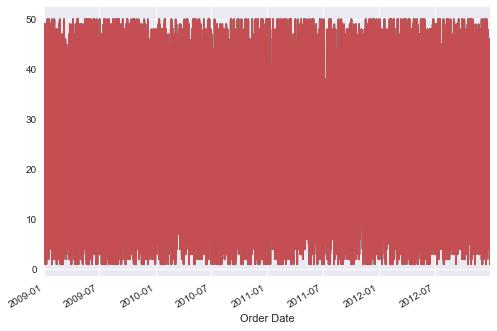

In [25]:
df["Order Quantity"].plot()
plt.show()

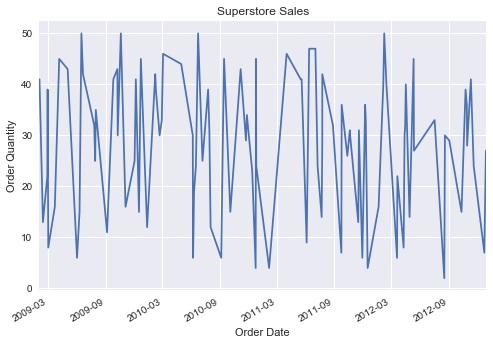

In [26]:
df2 = df.sample(n=100,random_state=25,axis=0) #100 samples, #random seed =25 and axis=0 (takes rows)
plt.xlabel("Order Date")
plt.ylabel("Order Quantity")
plt.title("Superstore Sales")

df2["Order Quantity"].plot()
plt.show()